In [1]:
from tensorflow.keras import datasets, utils
def make_data():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    # 원핫인코딩
    y_train = utils.to_categorical(y_train, 10)
    y_test = utils.to_categorical(y_test, 10)
    # 데이터 정규화
    X_train = X_train.astype('float32')
    X_train /= 255
    X_test = X_test.astype('float32')
    X_test /= 255
    return (X_train, y_train), (X_test, y_test)

In [2]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Flatten, Dropout
def make_model():
    model = Sequential()
    # padding='same': 출력크기를 입력크기와 같게 유지
    model.add(Conv2D(32, (3,3), padding='same', 
                     input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # 학습률 0.0001, decay: 학습속도를 감소시키는 옵션
    opt = optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [3]:
import matplotlib.pyplot as plt
def plot_loss(history, title=None):
    # history가 dict 타입이 아니면
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["loss"])
    plt.plot(history["val_loss"])
    # 타이틀이 설정되어 있지 않으면
    if title is not None:
        plt.title(title)
    plt.ylabel("손실")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [4]:
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history["accuracy"])
    plt.plot(history["val_accuracy"])
    if title is not None:
        plt.title(title)
    plt.ylabel("정확도")
    plt.xlabel("에포크")
    plt.legend(["학습 데이터 성능", "검증 데이터 성능"], loc=0)

In [5]:
#데이터 생성
(X_train,y_train), (X_test,y_test) = make_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

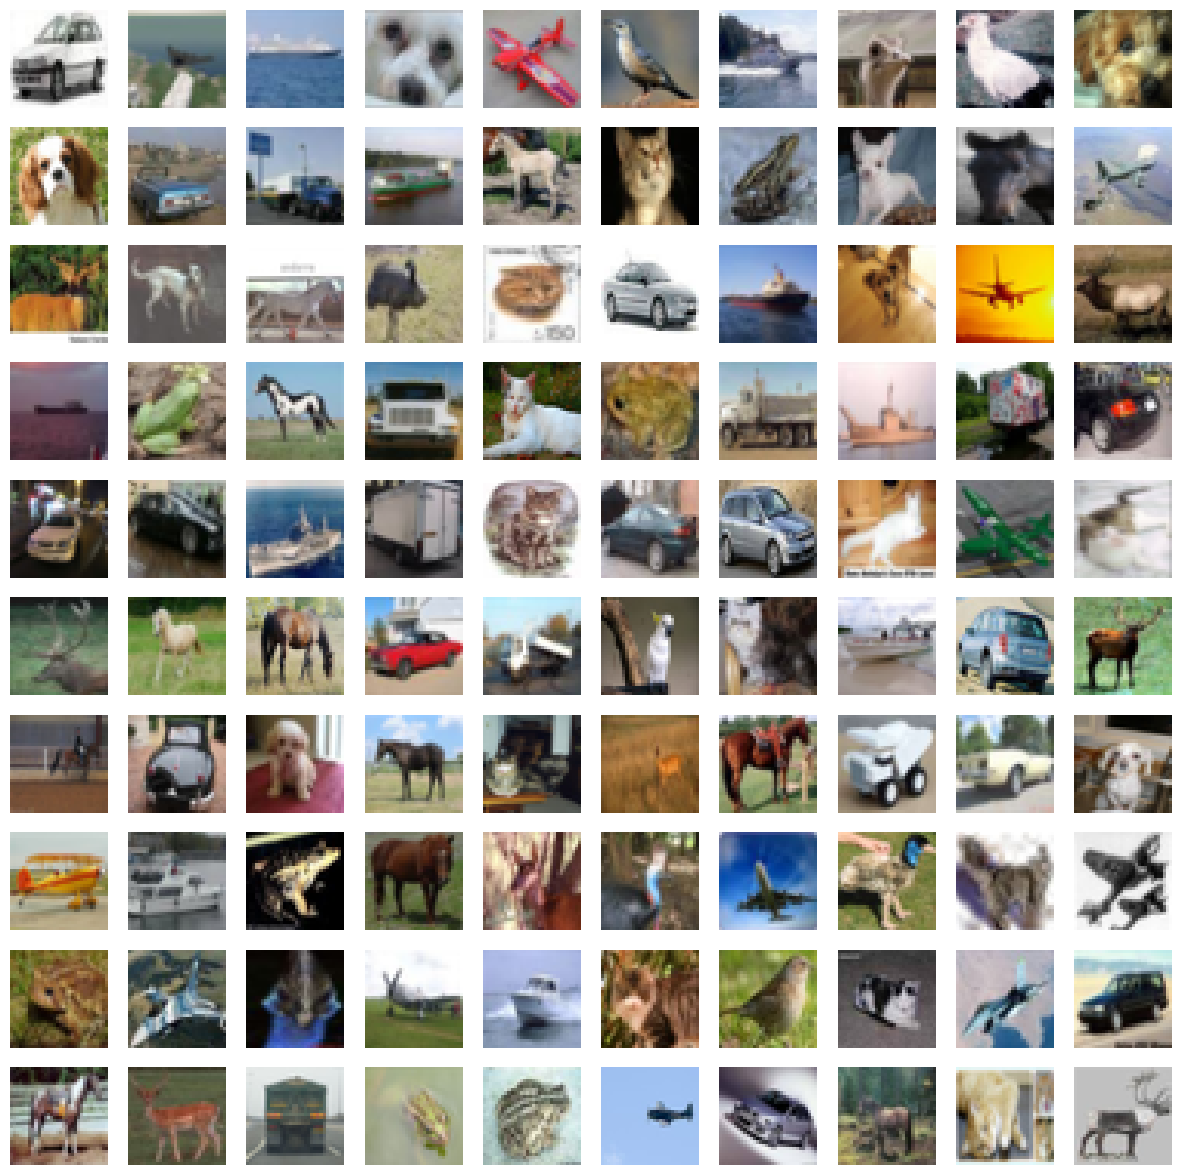

In [7]:
#훈련용 데이터 시각화
import numpy as np
fig, axes1 = plt.subplots(10, 10, figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train[i:i+1][0])

In [8]:
#모델 생성
model = make_model()

In [9]:
#학습 시간이 오래 걸림
import tensorflow as tf
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 17s 12ms/step - loss: 1.7513 - accuracy: 0.3636 - val_loss: 1.5328 - val_accuracy: 0.4353
Epoch 2/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4430 - accuracy: 0.4793 - val_loss: 1.3249 - val_accuracy: 0.5308
Epoch 3/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.3117 - accuracy: 0.5319 - val_loss: 1.3237 - val_accuracy: 0.5345
Epoch 4/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.2111 - accuracy: 0.5710 - val_loss: 1.1571 - val_accuracy: 0.5930
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.1275 - accuracy: 0.6003 - val_loss: 1.0698 - val_accuracy: 0.6262
Epoch 6/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0564 - accuracy: 0.6309 - val_loss: 1.0199 - val_accuracy: 0.6444
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.0036 - accuracy: 0.6485 - val_loss: 0.9727 -

In [10]:
#성능 평가
performance_test = model.evaluate(X_test, y_test, batch_size=128)
performance_test

79/79 [==============================] - 1s 6ms/step - loss: 0.7429 - accuracy: 0.7482


[0.7428662776947021, 0.748199999332428]

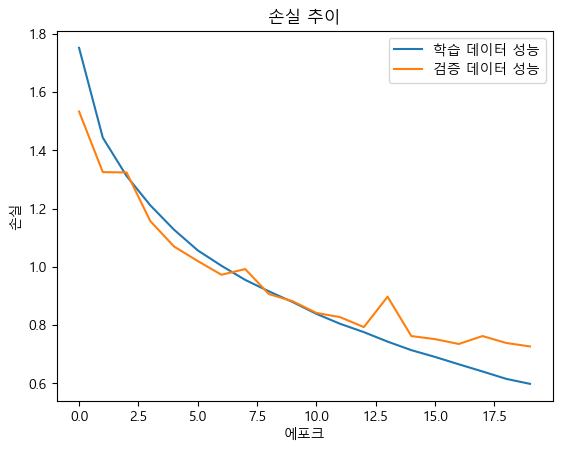

In [11]:
#학습과정 시각화
import matplotlib.font_manager as fm
font_location = "c:/windows/fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc("font", family=font_name)
plot_loss(history, "손실 추이")
plt.show()

In [12]:
#오분류표
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred, axis=1)
confusion_matrix(np.argmax(y_test, axis=1), y_pred)

313/313 [==============================] - 1s 2ms/step


array([[724,  19,  38,  14,  15,   6,   8,   5, 114,  57],
       [  5, 867,   2,   2,   3,   3,  10,   0,  39,  69],
       [ 59,   4, 568,  67,  91,  79,  74,  18,  21,  19],
       [ 17,   8,  48, 539,  64, 155,  82,  23,  32,  32],
       [ 18,   5,  44,  64, 696,  39,  65,  42,  20,   7],
       [  8,   7,  23, 139,  42, 695,  33,  30,   9,  14],
       [  3,   3,  17,  41,  18,  16, 882,   4,  11,   5],
       [ 13,   5,  24,  30,  59,  70,  11, 752,  13,  23],
       [ 33,  25,  10,   5,   4,   5,   4,   2, 893,  19],
       [ 13,  56,   4,   9,   6,   4,   6,   2,  34, 866]], dtype=int64)

In [13]:
#모델 저장
model.save('c:/data/cifar/cifar.h5')